In [1]:
#### https://www.mygreatlearning.com/blog/yolo-object-detection-using-opencv/

Gus Marquez DS687

Captain's OpenCV Object Detection in Image

(Help for these code can be found in OpenCV and MyGreatLearning)

Google Drive Mounted /content/drive/MyDrive/colab/

LOAD LIBRARIES and SETUP

In [2]:
# IMPORT
import numpy as np
import argparse
import cv2
import numpy as np
import time
import calendar
import imutils
from imutils.video import FPS
from imutils.video import VideoStream


In [3]:
# YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/colab/yolov3.weights", "/content/drive/MyDrive/colab/yolov3.cfg")
# Classes
classes = []
with open("/content/drive/MyDrive/colab/coco.names", "r") as f: 
  classes = [line.strip() for line in f.readlines()] 
outputlayers = net.getUnconnectedOutLayersNames() 


0.7409734 2 car
0.78628147 2 car
0.6256758 2 car
0.59571993 2 car
0.9994194 0 person
0.9996108 0 person
0.9723192 0 person
0.9811216 0 person
0.6646031 24 backpack
0.9912184 24 backpack
0.7098107 24 backpack
0.86912775 2 car


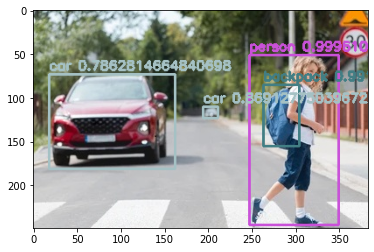

In [4]:
# GET PHOTO
img = cv2.imread("/content/drive/MyDrive/img77.jpg")

# SHAPE, BLOB and DETECT
height, width, channels = img.shape
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),     swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(outputlayers)

# DETECTION
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
        print(confidence, class_id, classes[class_id])
        # DETECTION
        center_x = int(detection[0] * width)
        center_y = int(detection[1] * height)
        w = int(detection[2] * width)
        h = int(detection[3] * height)
        # LOCATION
        x = int(center_x - w / 2)
        y = int(center_y - h / 2)
        # APPEND ALL
        boxes.append([x, y, w, h])
        confidences.append(float(confidence))
        class_ids.append(class_id)
    
# NMS
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# BOXES
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]]) + " " + str(confidences[i])
    color = colors[class_ids[i]]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX, 1/2, color, 2)
            
# DISPLAY
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
# Counters/Accumulators 
cnt =0;
carcc = .1; carconf = 0; carplot = []
personcc = .1; personconf = 0; personplot = []
motorbikecc = .1; motorbikeconf = 0; motorbikeplot = []
truckcc = .1; truckconf = 0; truckplot = []
FRAMENUM = 0
tt = 0

In [6]:
print(personcc)

0.1


Current timestamp: 1662671892
#################### 0.66815376 7 truck
#################### 0.82420796 7 truck
#################### 0.9932544 7 truck
#################### 0.97173727 7 truck
#################### 0.87679696 7 truck
#################### 0.6819697 7 truck
sofar 0.1 0.1 0.1 6.1
#################### 0.85862887 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 1.1 0.8586288690567017
#################### 0.71120834 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 2.1 1.569837212562561
#################### 0.7982645 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 3.1 2.368101716041565
#################### 0.97752374 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 4.1 3.3456254601478577
#################### 0.9953296 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 5.1 4.340955078601837
#################### 0.70185363 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 6.1 5.042808711528778
#################### 0.9416049 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 7.1 5.9844136238098145
#################### 0.5046967 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 8.1 6.489110350608826

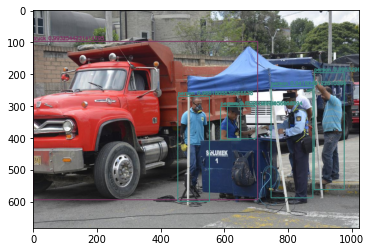

#################### 0.7409734 2 car
#################### 0.78628147 2 car
#################### 0.6256758 2 car
#################### 0.59571993 2 car
#################### 0.9994194 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 13.1 11.170358955860138
#################### 0.9996108 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 14.1 12.169969737529755
#################### 0.9723192 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 15.1 13.14228892326355
#################### 0.9811216 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 16.1 14.123410522937775
sofar 4.1 16.1 0.1 6.1
#################### 0.6646031 24 backpack
#################### 0.9912184 24 backpack
#################### 0.7098107 24 backpack
sofar 4.1 16.1 0.1 6.1
#################### 0.86912775 2 car
sofar 5.1 16.1 0.1 6.1


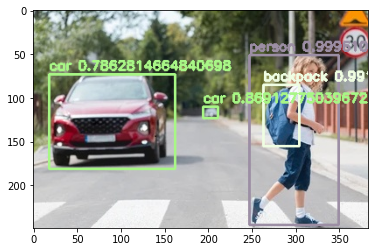

#################### 0.6662212 2 car
#################### 0.615172 2 car
#################### 0.827444 2 car
#################### 0.9943176 2 car
sofar 9.1 16.1 0.1 6.1
#################### 0.5020666 2 car
#################### 0.8070741 2 car
#################### 0.69898707 2 car
#################### 0.5885576 2 car
#################### 0.99060357 2 car
#################### 0.98763114 2 car
#################### 0.985894 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 17.1 15.109304547309875
#################### 0.9648944 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 18.1 16.074198961257935
#################### 0.9776577 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 19.1 17.051856637001038
#################### 0.9956932 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 20.1 18.047549843788147
#################### 0.79207534 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 21.1 18.83962517976761
#################### 0.9962345 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 22.1 19.835859656333923
#################### 0.63287234 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 

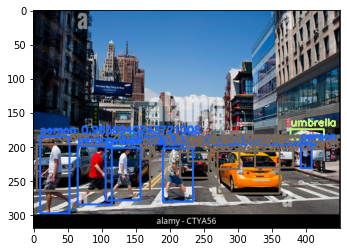

#################### 0.9723094 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 36.1 31.58265995979309
#################### 0.999759 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 37.1 32.582418978214264
#################### 0.6260108 2 car
#################### 0.7769352 2 car
sofar 24.1 37.1 0.1 6.1
#################### 0.6211263 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 38.1 33.20354527235031
#################### 0.7274385 2 car
#################### 0.8821103 2 car
#################### 0.96901387 2 car
#################### 0.84829867 2 car
#################### 0.99477226 1 bicycle
#################### 0.96271014 1 bicycle
#################### 0.976306 1 bicycle
#################### 0.79609805 1 bicycle
sofar 28.1 38.1 0.1 6.1
sofar 28.1 38.1 0.1 6.1


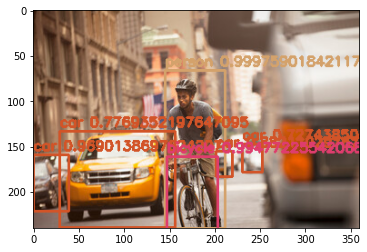

#################### 0.9833956 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 39.1 34.18694084882736
#################### 0.6275783 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 40.1 34.81451916694641
#################### 0.9990674 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 41.1 35.813586592674255
#################### 0.9597452 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 42.1 36.77333182096481
#################### 0.99157286 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 43.1 37.76490467786789
#################### 0.8420596 24 backpack
sofar 28.1 43.1 0.1 6.1
#################### 0.7176865 2 car
#################### 0.7021973 2 car
#################### 0.60941887 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 44.1 38.374323546886444
#################### 0.8176219 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 45.1 39.19194543361664
#################### 0.87997085 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 46.1 40.07191628217697
#################### 0.5528549 2 car
#################### 0.62790376 24 backpack
sofar 31.1 46.1 0.1 6.1
#################### 0.5111727 2 car


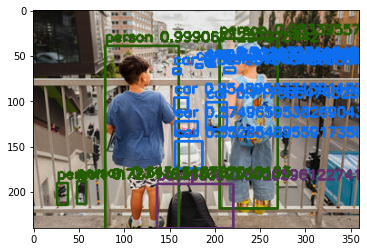

#################### 0.6616036 5 bus
#################### 0.99845004 5 bus
#################### 0.9973642 5 bus
sofar 40.1 50.1 0.1 6.1
#################### 0.5334317 7 truck
#################### 0.817874 5 bus
#################### 0.7269476 5 bus
#################### 0.6040374 2 car
#################### 0.9779106 2 car
#################### 0.88918805 2 car
#################### 0.5161337 7 truck
#################### 0.75381726 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 51.1 43.37298095226288
#################### 0.5444503 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 52.1 43.917431235313416
#################### 0.82271385 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 53.1 44.74014508724213
#################### 0.9852511 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 54.1 45.72539621591568
#################### 0.9242266 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 55.1 46.649622797966
#################### 0.55813295 26 handbag
#################### 0.5216823 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 56.1 47.1713051199913
#################### 0.8

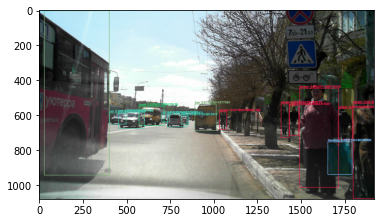

sofar 52.1 60.1 0.1 8.1
#################### 0.7327739 5 bus
#################### 0.85494906 2 car
#################### 0.5579008 2 car
#################### 0.96816874 2 car
#################### 0.64069945 2 car
#################### 0.73094636 2 car
sofar 57.1 60.1 0.1 8.1
#################### 0.6641969 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 61.1 50.613401770591736
#################### 0.95784706 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 62.1 51.57124882936478
#################### 0.66436 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 63.1 52.23560881614685
sofar 57.1 63.1 0.1 8.1


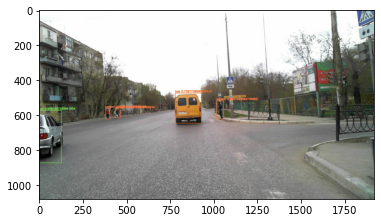

#################### 0.9990398 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 64.1 53.234648644924164
#################### 0.98908037 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 65.1 54.22372901439667
#################### 0.998249 3 motorbike
#################### 0.84185725 3 motorbike
#################### 0.9527622 3 motorbike
sofar 57.1 65.1 3.1 8.1
#################### 0.8388468 5 bus
#################### 0.7837046 5 bus
#################### 0.79350114 5 bus
#################### 0.6163779 2 car
#################### 0.6960721 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 66.1 54.919801115989685
#################### 0.94491774 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 67.1 55.86471885442734
#################### 0.5813622 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 68.1 56.446081042289734
#################### 0.6817709 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 69.1 57.12785196304321
#################### 0.9550818 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 70.1 58.08293378353119
#################### 0.9930352 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 71.1

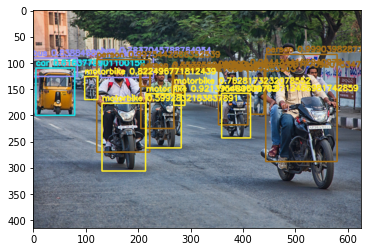

#################### 0.9035388 2 car
#################### 0.9971062 2 car
#################### 0.9881626 2 car
#################### 0.99561507 2 car
#################### 0.9314273 2 car
sofar 63.1 85.1 22.1 8.1
#################### 0.929917 2 car
#################### 0.52756965 2 car
#################### 0.9974312 2 car
#################### 0.65815336 2 car
#################### 0.8321978 2 car
#################### 0.98819214 2 car
#################### 0.58487785 2 car
#################### 0.9167081 2 car
#################### 0.81413853 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 86.1 71.21292811632156
#################### 0.69356793 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 87.1 71.90649604797363
#################### 0.68930525 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 88.1 72.59580129384995
#################### 0.5690173 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 89.1 73.16481858491898
sofar 71.1 89.1 22.1 8.1
#################### 0.75397396 0 person
>>>>>>>>>>>>>>>>>>>>>>>>> 90.1 73.91879254579544
################

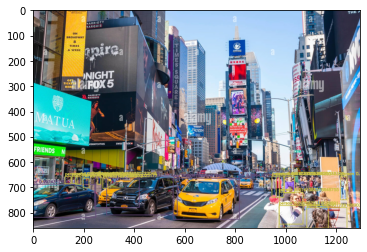

Start: 1662671892
End: 1662671911
Time: 19


In [7]:


import cv2
from google.colab.patches import cv2_imshow
import os
import glob
from PIL import Image

#SET TIMER
# this timer for CV is the same for AI
current_GMT = time.gmtime()
time_stamp_start = calendar.timegm(current_GMT)
print("Current timestamp:", time_stamp_start)
fps = FPS().start()


# Counters/Accumulators 
cnt =0;
carcc = .1; carconf = 0; carplot = []
personcc = .1; personconf = 0; personplot = []
motorbikecc = .1; motorbikeconf = 0; motorbikeplot = []
truckcc = .1; truckconf = 0; truckplot = []
FRAMENUM = 0
tt = 0


# Begin detection/boxes


images=glob.glob("/content/drive/MyDrive/colab/testtwo/*.jpg")



for image in images:

  # GET PHOTO
  img = cv2.imread(image)

  # SHAPE, BLOB and DETECT
  height, width, channels = img.shape
  blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),     swapRB=True, crop=False)
  net.setInput(blob)
  outs = net.forward(outputlayers)

  # DETECTION
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      #print("#########", class_id, confidence)
      if confidence > 0.5:
          print("####################",confidence, class_id, classes[class_id])
          # DETECTION
          center_x = int(detection[0] * width)
          center_y = int(detection[1] * height)
          w = int(detection[2] * width)
          h = int(detection[3] * height)
          # LOCATION
          x = int(center_x - w / 2)
          y = int(center_y - h / 2)
          # APPEND ALL
          boxes.append([x, y, w, h])
          confidences.append(float(confidence))
          class_ids.append(class_id)       
          if classes[class_id] == "car":
            carcc = carcc + 1
            carconf = carconf + confidence
            carplot.append(confidences)
          if classes[class_id] == "person":
            personcc = personcc + 1
            personconf = personconf + confidence
            personplot.append(confidence)
            print(">>>>>>>>>>>>>>>>>>>>>>>>>", personcc, personconf)
          if classes[class_id] == "motorbike":
            motorbikecc = motorbikecc + 1
            motorbikeconf = motorbikeconf + confidence
            motorbikeplot.append(confidences)
          if classes[class_id] == "truck":
            truckcc = truckcc + 1
            truckconf = truckconf + confidence
            truckplot.append(confidences)
    print("sofar",carcc, personcc, motorbikecc, truckcc)
  # NMS
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  colors = np.random.uniform(0, 255, size=(len(classes), 3))

  # BOXES
  for i in range(len(boxes)):
    if i in indexes:
      x, y, w, h = boxes[i]
      label = str(classes[class_ids[i]]) + " " + str(confidences[i])
      color = colors[class_ids[i]]
      cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
      cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX, 1/2, color, 2)
              
  # DISPLAY
  import matplotlib.pyplot as plt
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()


  # TIMER
current_GMT = time.gmtime()
time_stamp_end = calendar.timegm(current_GMT)
print("Start:", time_stamp_start)
print("End:", time_stamp_end)
print("Time:", time_stamp_end - time_stamp_start)


fps.stop()

In [8]:
print(personcc)

99.1


{'Cars': 0.7672900604976495, 'Persons': 0.8004429073314494, 'Motobikes': 0.8193705874870265, 'Trucks': 0.7488500630414044}



<BarContainer object of 4 artists>

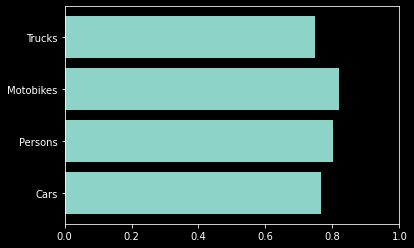

In [9]:


# PLOT SCORES RESULTS

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

xkeys = ['Cars', 'Persons', 'Motobikes', 'Trucks']
xvalues = [carconf/carcc, personconf/personcc, motorbikeconf/motorbikecc, truckconf/truckcc]
xd = dict(zip(xkeys, xvalues))
print(xd)
print()



group_data = list(xd.values())
group_names = list(xd.keys())
group_mean = np.mean(group_data)

fig, ax = plt.subplots()
ax.set_xlim([0,1])
ax.barh(group_names, group_data)

In [10]:



#TOTALS........

# TIMER
current_GMT = time.gmtime()
time_stamp_end = calendar.timegm(current_GMT)
print("Start:", time_stamp_start)
print("End:", time_stamp_end)
print("Time:", time_stamp_end - time_stamp_start)


fps.stop()

# REPORTS

print("[INFO] elasped time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))

print("Cars = ", carcc, " Confidences = ", carconf, " Cars average confidence = " , carconf/carcc)

print("Persons = ", personcc, " Confidences = ", personconf, " Persons average confidence = " , personconf/personcc)

print("Motorbikes = ", motorbikecc, " Confidences = ", motorbikeconf, " Motobikes average confidence = " , motorbikeconf/motorbikecc)

print("Trucks = ", truckcc, " Confidences = ", truckconf, " Trucks average confidence = " , truckconf/truckcc)

# do a bit of cleanup
cv2.destroyAllWindows()


Start: 1662671892
End: 1662671911
Time: 19
[INFO] elasped time: 19.23
[INFO] approx. FPS: 0.00
Cars =  74.1  Confidences =  56.856193482875824  Cars average confidence =  0.7672900604976495
Persons =  99.1  Confidences =  79.32389211654663  Persons average confidence =  0.8004429073314494
Motorbikes =  22.1  Confidences =  18.108089983463287  Motobikes average confidence =  0.8193705874870265
Trucks =  8.1  Confidences =  6.065685510635376  Trucks average confidence =  0.7488500630414044


In [11]:

#  This part transfer save to be load via drive in ImageAI notebook

from matplotlib import docstring
import numpy as np 
cot2cv = carplot # create an array of 1000 1's for the example 
pot2cv = personplot
mot2cv = motorbikeplot
tot2cv = truckplot
xvt2cv = xvalues

np.save('/content/drive/MyDrive/colab/var/cot2cv', cot2cv)

np.save('/content/drive/MyDrive/colab/var/pot2cv', pot2cv)
        
np.save('/content/drive/MyDrive/colab/var/mot2cv', mot2cv)
        
np.save('/content/drive/MyDrive/colab/var/tot2cv', tot2cv)

np.save('/content/drive/MyDrive/colab/var/xvt2cv', xvt2cv)

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [12]:
#Tranfer timestamp to ImageAI

trans_time = time_stamp_end - time_stamp_start
file = open("/content/drive/MyDrive/colab/var/transtimet2cv.txt", "w")
str = repr(trans_time)
file.write(str)
file.close()
